In [1]:
import pandas as pd
import geopandas as gpd
#import movingpandas as mpd
import matplotlib.pyplot as plt
import shapely
import numpy as np
import networkx as nx
import folium
import math
import fsspec
import pyproj
import copy
from shapely.geometry import Polygon, MultiLineString, LineString, Point
from shapely.ops import cascaded_union, nearest_points, split, linemerge,unary_union
from collections import Counter
from osgeo import gdal, ogr
from os import listdir,scandir
from os.path import isfile, join

In [2]:
rivers = {}
for i,file in enumerate(scandir(r"C://Users//floorbakker//Documents//Sevilla//Data//Geo//Landboundaries//")):
    if file.path.endswith('.geojson'):
        rivers[i] = gpd.read_file(file.path)

In [3]:
polygon_list = []
for i in rivers:
    df = rivers[i]
    Polygons = cascaded_union(list(df['geometry'])) 
    if Polygons.geom_type == 'MultiPolygon':
        Polygons = list(Polygons)
        for poly in Polygons:
            polygon_list.append(poly)
        continue

    #if Polygons.geom_type == 'Polygon':
    polygon_list.append(Polygons)
    
polygons = cascaded_union(polygon_list) 
river = gpd.GeoDataFrame(geometry=[polygons])

C:\Users\floorbakker\AppData\Local\Temp\ipykernel_7932\3448910986.py:4: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  Polygons = cascaded_union(list(df['geometry']))
C:\Users\floorbakker\AppData\Local\Temp\ipykernel_7932\3448910986.py:14: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  polygons = cascaded_union(polygon_list)


In [4]:
terminals = {}
for i,file in enumerate(scandir(r"C://Users//floorbakker//Documents//Sevilla//Data//Geo//Terminals//")):
    if file.path.endswith('.geojson'):
        terminals[i] = gpd.read_file(file.path)

In [5]:
terminal = gpd.GeoDataFrame(geometry=[terminals[0].drop(1,axis=0)['geometry'].iloc[0]])

In [51]:
fairways = {}
for i,file in enumerate(scandir(r"C://Users//floorbakker//Documents//Sevilla//Data//Geo//Fairway//")):
    if file.path.endswith('.geojson'):
        fairways[i] = gpd.read_file(file.path)

In [53]:
fairway = gpd.GeoDataFrame(geometry=[fairways[0]['geometry'].iloc[0]])

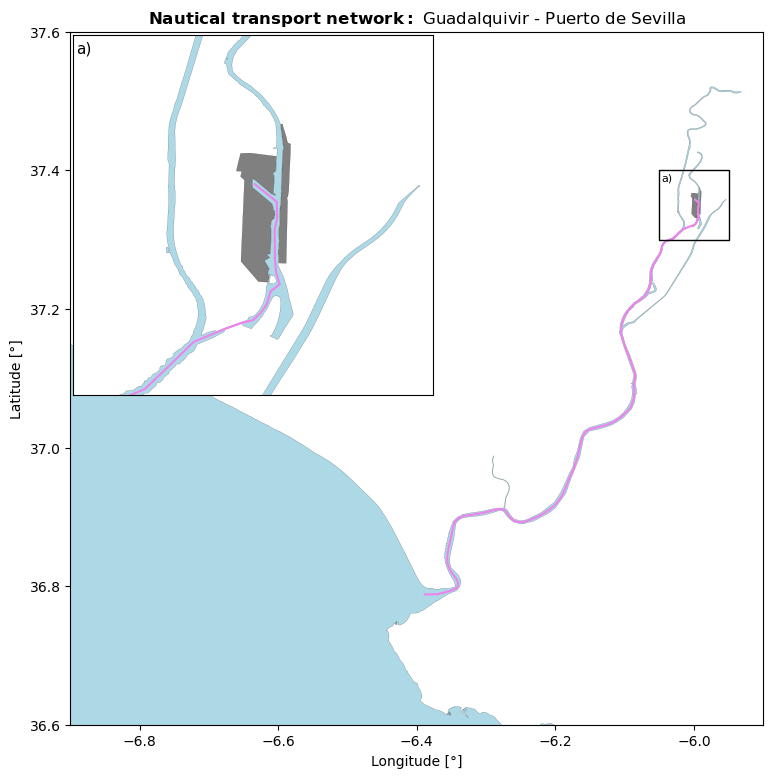

In [128]:
fig,ax = plt.subplots(figsize=[16,9])
water_color = 'lightblue'
boundary_color = 'k'
fairway_color = 'violet'
anchorage_color = 'limegreen'
terminal_color = 'grey'
terminal.plot(ax=ax,facecolor=terminal_color,edgecolor=boundary_color,linewidth=0.1)
river.plot(ax=ax,facecolor=water_color,edgecolor=boundary_color,linewidth=0.1)
fairway.plot(ax=ax,facecolor=None,edgecolor=fairway_color)
ax.fill([-6.05,-6.05,-5.95,-5.95],[37.3,37.4,37.4,37.3],facecolor="none",edgecolor='k',zorder=10)
ax.text(-6.0475,37.385,'a)',size=8)
ax.set_xlim([-6.9,-5.9])
ax.set_ylim([36.6,37.6])
ax.set_title(r"$\bf{" + "Nautical\ transport\ network:" + "}$" + " Guadalquivir - Puerto de Sevilla")
ax.set_xlabel('Longitude [\u00b0]')
ax.set_ylabel('Latitude [\u00b0]')

ax1 = plt.axes([0.11, 0.4765, .6, .4])
terminal.plot(ax=ax1,facecolor=terminal_color,edgecolor=boundary_color,linewidth=0.1)
river.plot(ax=ax1,facecolor=water_color,edgecolor=boundary_color,linewidth=0.1)
fairway.plot(ax=ax1,facecolor=None,edgecolor=fairway_color)
ax1.text(-6.049,37.395,'a)',size=11)
ax1.set_xlim([-6.05,-5.95])
ax1.set_ylim([37.3,37.4])
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()